In [1842]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import keras
figsize=(10,10)

Using TensorFlow backend.


In [1810]:
data = pd.read_csv("H:\KaggleCompetitions\Titanic\\train.csv")
data['Pclass']=data['Pclass'].astype('category')
data['Survived']=data['Survived'].astype('category')
data['Sex']=data['Sex'].astype('category')
data['Embarked']=data['Embarked'].astype('category')
data['Dataset'] = 'Training Dataset'
data.dropna(subset=['Embarked'],axis=0,inplace=True)
#data.drop(['Ticket','Cabin'],axis=1,inplace=True)
data.head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Dataset
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Training Dataset
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Training Dataset
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Training Dataset


In [1811]:
data.groupby(["Embarked","Pclass"])['Fare'].mean()

Embarked  Pclass
C         1         104.718529
          2          25.358335
          3          11.214083
Q         1          90.000000
          2          12.350000
          3          11.183393
S         1          70.364862
          2          20.327439
          3          14.644083
Name: Fare, dtype: float64

In [1812]:
data["Embarked"].fillna('S')
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Dataset
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Training Dataset
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Training Dataset
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Training Dataset


In [1813]:
test = pd.read_csv("H:\KaggleCompetitions\Titanic\\test.csv")
survival= pd.read_csv("H:\KaggleCompetitions\Titanic\\gender_submission.csv")
test = pd.merge(test,survival, how="inner", on="PassengerId")
test['Dataset'] = 'Test Dataset'
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Dataset
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,Test Dataset
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,Test Dataset
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,Test Dataset


In [1814]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Dataset          0
dtype: int64

In [1815]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
Dataset          0
dtype: int64

In [1816]:
test["Fare"] = test.groupby(by = ["Pclass"])["Fare"].transform(lambda x:x.fillna(x.mean()))
test[test["PassengerId"]==1044]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Dataset
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,12.459678,NaN,S,0,Test Dataset


In [1817]:
train_test_data = pd.concat([data,test])
train_test_data['Title']=train_test_data['Name'].str.partition(',')[2].str.partition('.')[0]
train_test_data.head(3)

,Age,Cabin,Dataset,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,Training Dataset,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,Mr
1,38.0,C85,Training Dataset,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,Mrs
2,26.0,NaN,Training Dataset,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,Miss


In [1818]:
train_test_data["Fare"] = train_test_data.groupby(by = ["Pclass"])["Fare"].transform(lambda x:x.fillna(x.mean()))
test.loc[test.PassengerId.isin(missing_age_test.PassengerId),["Fare"]]=missing_age_test.loc[missing_age_test.PassengerId.isin(test.PassengerId),["Age"]].values
train_test_data.isnull().sum()

Age             263
Cabin          1014
Dataset           0
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived          0
Ticket            0
Title             0
dtype: int64

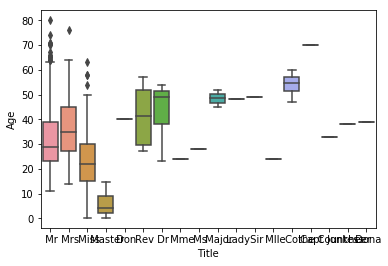

In [1819]:
sns.boxplot(x="Title",y="Age",data = train_test_data)

In [1820]:
train_test_data =pd.get_dummies(train_test_data,columns=["Pclass","Sex","Embarked","Title"],drop_first=True)

In [1822]:
X_test= train_test_data.drop(["Ticket","Cabin","Survived","Name","Dataset"], axis=1)
Y_test = train_test_data["Survived"]
X_test['SibSp']=X_test['SibSp'].astype('int')
X_test['Parch']=X_test['Parch'].astype('int')
X_test['Pclass_2']=X_test['Pclass_2'].astype('category')
X_test['Pclass_3']=X_test['Pclass_3'].astype('category')
X_test['Sex_male']=X_test['Sex_male'].astype('category')
X_test['Embarked_Q']=X_test['Embarked_Q'].astype('category')
X_test['Embarked_S']=X_test['Embarked_S'].astype('category')
X_test['Title_ Col']=X_test['Title_ Col'].astype('category')
X_test['Title_ Don']=X_test['Title_ Don'].astype('category')
X_test['Title_ Dona']=X_test['Title_ Dona'].astype('category')
X_test['Title_ Dr']=X_test['Title_ Dr'].astype('category')
X_test['Title_ Jonkheer']=X_test['Title_ Jonkheer'].astype('category')
X_test['Title_ Lady']=X_test['Title_ Lady'].astype('category')
X_test['Title_ Major']=X_test['Title_ Major'].astype('category')
X_test['Title_ Master']=X_test['Title_ Master'].astype('category')
X_test['Title_ Miss']=X_test['Title_ Miss'].astype('category')
X_test['Title_ Mme']=X_test['Title_ Mme'].astype('category')
X_test['Title_ Mlle']=X_test['Title_ Mlle'].astype('category')
X_test['Title_ Mr']=X_test['Title_ Mr'].astype('category')
X_test['Title_ Mrs']=X_test['Title_ Mrs'].astype('category')
X_test['Title_ Ms']=X_test['Title_ Ms'].astype('category')
X_test['Title_ Mr']=X_test['Title_ Mr'].astype('category')
X_test['Title_ Rev']=X_test['Title_ Rev'].astype('category')
X_test['Title_ Sir']=X_test['Title_ Sir'].astype('category')
X_test['Title_ the Countess']=X_test['Title_ the Countess'].astype('category')
X_test.dtypes

Age                     float64
Fare                    float64
Parch                     int32
PassengerId               int64
SibSp                     int32
Pclass_2               category
Pclass_3               category
Sex_male               category
Embarked_Q             category
Embarked_S             category
Title_ Col             category
Title_ Don             category
Title_ Dona            category
Title_ Dr              category
Title_ Jonkheer        category
Title_ Lady            category
Title_ Major           category
Title_ Master          category
Title_ Miss            category
Title_ Mlle            category
Title_ Mme             category
Title_ Mr              category
Title_ Mrs             category
Title_ Ms              category
Title_ Rev             category
Title_ Sir             category
Title_ the Countess    category
dtype: object

In [1823]:
missing_age_test = X_test[X_test["Age"].isnull()]
missing_age_test['PassengerId'] = X_test[X_test["Age"].isnull()]["PassengerId"]
X_missing_age_test = missing_age_test.drop(["Age","PassengerId","Embarked_Q","Embarked_S","Fare"],axis = 1)
Y_missing_age_test = missing_age_test[["Age"]]

non_missing_age_test = X_test[X_test["Age"].notnull()]
X_non_missing_age_test = non_missing_age_test.drop(["Age","PassengerId","Embarked_Q","Embarked_S","Fare"],axis = 1)
Y_non_missing_age_test = non_missing_age_test[["Age"]]

"""
#Linear Regression
classifier_LR = LinearRegression()
classifier_LR.fit(X_non_missing_age_test,Y_non_missing_age_test)
accuracy = classifier_LR.score(X_non_missing_age_test,Y_non_missing_age_test)
#print(accuracy)

forecast_age=classifier_LR.predict(X_missing_age_test)
missing_age_test["Age"] = forecast_age"""

#Random Forest Classification
from sklearn.ensemble import RandomForestRegressor
regressor_RF = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_RF.fit(X_non_missing_age_test,Y_non_missing_age_test)
accuracy = regressor_RF.score(X_non_missing_age_test,Y_non_missing_age_test)


# Predicting a new result
forecast_age = regressor_RF.predict(X_missing_age_test)
missing_age_test["Age"] = forecast_age


data.loc[data.PassengerId.isin(missing_age_test.PassengerId),["Age"]]=missing_age_test.loc[missing_age_test.PassengerId.isin(data.PassengerId),["Age"]].values
test.loc[test.PassengerId.isin(missing_age_test.PassengerId),["Age"]]=missing_age_test.loc[missing_age_test.PassengerId.isin(test.PassengerId),["Age"]].values
print(accuracy)

C:\Users\Prajakta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Prajakta\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.532220472454


C:\Users\Prajakta\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [1824]:
data.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,29.390383,0.524184,0.382452,32.096681
std,256.998173,13.531414,1.103705,0.806761,49.697504
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,21.000000,0.000000,0.000000,7.895800
50%,446.000000,28.654175,0.000000,0.000000,14.454200
75%,668.000000,36.996585,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


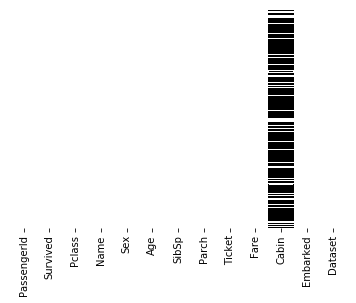

In [1825]:
sns.heatmap(data=data.isnull(),yticklabels=False, cbar=False,cmap='binary')

In [1826]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Dataset          0
dtype: int64

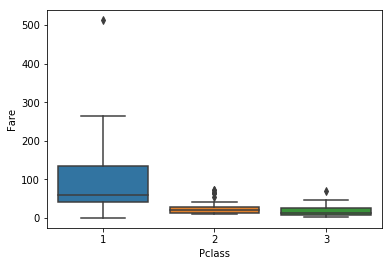

In [1827]:
sns.boxplot(x="Pclass",y="Fare",data = test)

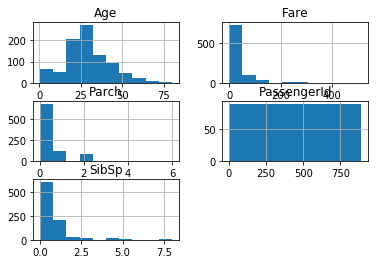

In [1828]:
data.hist()
plt.show()

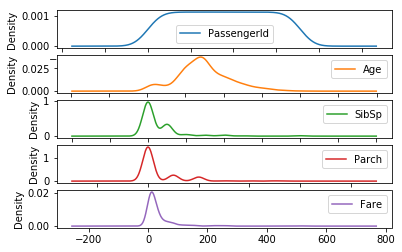

In [1829]:
data.plot(kind='density',subplots=True,sharex=False)
plt.show()

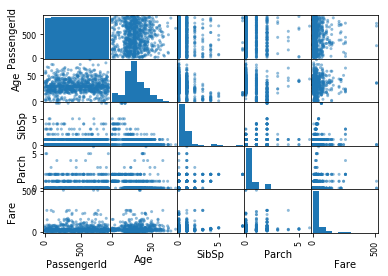

In [1830]:
from pandas.plotting import scatter_matrix
scatter_matrix(data)
plt.show()

(array([  42.,   21.,   16.,   34.,   87.,  117.,   95.,  176.,   76.,
          54.,   55.,   36.,   30.,   16.,   13.,   10.,    4.,    5.,
           1.,    1.]),
 array([  0.42 ,   4.399,   8.378,  12.357,  16.336,  20.315,  24.294,
         28.273,  32.252,  36.231,  40.21 ,  44.189,  48.168,  52.147,
         56.126,  60.105,  64.084,  68.063,  72.042,  76.021,  80.   ]),
 <a list of 20 Patch objects>)

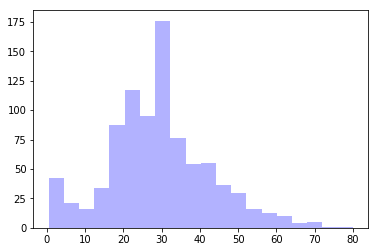

In [1831]:
plt.hist(data["Age"].dropna(),bins=20,facecolor="blue",alpha = 0.3)

In [1832]:
data =pd.get_dummies(data,columns=["Pclass","Sex","Embarked"],drop_first=True)
#data.drop(['Title','Name'],axis=1,inplace=True)

In [1833]:
#data.drop(['Name'],axis=1,inplace=True)
data.dtypes

PassengerId       int64
Survived       category
Name             object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Dataset          object
Pclass_2          uint8
Pclass_3          uint8
Sex_male          uint8
Embarked_Q        uint8
Embarked_S        uint8
dtype: object

In [1834]:
data.drop(['Name','PassengerId','Ticket','Cabin','Dataset'],axis=1,inplace=True)
data['Pclass_2']=data['Pclass_2'].astype('category')
data['Pclass_3']=data['Pclass_3'].astype('category')
data['Sex_male']=data['Sex_male'].astype('category')
data['Embarked_Q']=data['Embarked_Q'].astype('category')
data['Embarked_S']=data['Embarked_S'].astype('category')
"""data['Title_ Col']=data['Title_ Col'].astype('category')
data['Title_ Don']=data['Title_ Don'].astype('category')
data['Title_ Dr']=data['Title_ Dr'].astype('category')
data['Title_ Jonkheer']=data['Title_ Jonkheer'].astype('category')
data['Title_ Lady']=data['Title_ Lady'].astype('category')
data['Title_ Major']=data['Title_ Major'].astype('category')
data['Title_ Master']=data['Title_ Master'].astype('category')
data['Title_ Miss']=data['Title_ Miss'].astype('category')
data['Title_ Mme']=data['Title_ Mme'].astype('category')
data['Title_ Mlle']=data['Title_ Mlle'].astype('category')
data['Title_ Mr']=data['Title_ Mr'].astype('category')
data['Title_ Mrs']=data['Title_ Mrs'].astype('category')
data['Title_ Ms']=data['Title_ Ms'].astype('category')
data['Title_ Mr']=data['Title_ Mr'].astype('category')
data['Title_ Rev']=data['Title_ Rev'].astype('category')
data['Title_ Sir']=data['Title_ Sir'].astype('category')
data['Title_ the Countess']=data['Title_ the Countess'].astype('category')"""
data.head(3)


,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1


In [1835]:
data['Survived']=data['Survived'].astype('category')
data['SibSp']=data['SibSp'].astype('int')
data['Parch']=data['Parch'].astype('int')
data['Pclass_2']=data['Pclass_2'].astype('category')
data['Pclass_3']=data['Pclass_3'].astype('category')
data['Sex_male']=data['Sex_male'].astype('category')
data['Embarked_Q']=data['Embarked_Q'].astype('category')
data['Embarked_S']=data['Embarked_S'].astype('category')
data['Age'] = data['Age'].abs()
"""data=data.drop(['Title_ Col','Title_ Don','Title_ Dr','Title_ Jonkheer','Title_ Lady','Title_ Major','Title_ Master'
                ,'Title_ Miss','Title_ Mlle','Title_ Mme',
                'Title_ Mr','Title_ Mrs','Title_ Ms','Title_ Rev','Title_ Sir','Title_ the Countess'],axis =1)"""
data.isnull().sum()

Survived      0
Age           0
SibSp         0
Parch         0
Fare          0
Pclass_2      0
Pclass_3      0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [1836]:
from sklearn.linear_model import LogisticRegression
X= data.drop(["Survived","Embarked_Q","Embarked_S","Fare"], axis=1)
y= data["Survived"]
classifier_log=LogisticRegression()
classifier_log.fit(X, y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [1837]:
test =pd.get_dummies(test,columns=["Pclass","Sex","Embarked"],drop_first=True)
test.drop(["PassengerId","Name","Ticket","Cabin","Dataset"],axis=1,inplace=True)
test['Survived']=test['Survived'].astype('category')
test['SibSp']=test['SibSp'].astype('int')
test['Parch']=test['Parch'].astype('int')
test['Pclass_2']=test['Pclass_2'].astype('category')
test['Pclass_3']=test['Pclass_3'].astype('category')
test['Sex_male']=test['Sex_male'].astype('category')
test['Embarked_Q']=test['Embarked_Q'].astype('category')
test['Embarked_S']=test['Embarked_S'].astype('category')
test.dtypes

Age            float64
SibSp            int32
Parch            int32
Fare           float64
Survived      category
Pclass_2      category
Pclass_3      category
Sex_male      category
Embarked_Q    category
Embarked_S    category
dtype: object

In [1838]:
X_test = test.drop(["Survived","Embarked_Q","Embarked_S","Fare"], axis=1)
pred=classifier_log.predict(X_test)

In [1839]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix \n",confusion_matrix(test["Survived"], pred))
print("\nClassification Report \n", classification_report(test["Survived"], pred))

Confusion Matrix 
 [[260   6]
 [  9 143]]

Classification Report 
              precision    recall  f1-score   support

          0       0.97      0.98      0.97       266
          1       0.96      0.94      0.95       152

avg / total       0.96      0.96      0.96       418



In [1840]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X)
X_test = sc.transform(X_test)

# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
classifier_RF.fit(X_train, y)

# Predicting the Test set results
y_pred = classifier_RF.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test["Survived"], pred)
print("Confusion Matrix \n",cm)

# Visualising the Training set results
"""from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()"""

# Visualising the Test set results
"""from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_pred
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()"""

Confusion Matrix 
 [[260   6]
 [  9 143]]


"from matplotlib.colors import ListedColormap\nX_set, y_set = X_test, y_pred\nX1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),\n                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))\nplt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),\n             alpha = 0.75, cmap = ListedColormap(('red', 'green')))\nplt.xlim(X1.min(), X1.max())\nplt.ylim(X2.min(), X2.max())\nfor i, j in enumerate(np.unique(y_set)):\n    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],\n                c = ListedColormap(('red', 'green'))(i), label = j)\nplt.title('Random Forest Classification (Test set)')\nplt.xlabel('Age')\nplt.ylabel('Estimated Salary')\nplt.legend()\nplt.show()"

In [1841]:
from sklearn.naive_bayes import GaussianNB
classifier_ = GaussianNB()
classifier.fit(X_train, y)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test["Survived"], y_pred)
print("Confusion Matrix \n",confusion_matrix(test["Survived"], pred))

Confusion Matrix 
 [[260   6]
 [  9 143]]
